# Setup 

## Dependencies 

In [642]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
import seaborn as sns

## Data source & Data dictionary: 

The raw data was taken from [here](https://www.kaggle.com/datasets/joniarroba/noshowappointments?resource=download)

Download the csv file and make sure it is in the same folder as this Notebook 

## Read the file

In [281]:
medical_df = pd.read_csv("Medical Appointments no shows.csv")

# Exploring & Cleaning the data set

### Explore the data 

In [283]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [89]:
medical_df.head(5)      

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Checking for Nulls, Duplicates and Unreasonable values

In [285]:
medical_df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

#### Check for duplicates in the "PatientId" and the "AppointmentID" columns

In [287]:
medical_df.PatientId.nunique()   #The number of patients 

62299

In [291]:
medical_df.AppointmentID.nunique()    #the number of appointments 

110527

#### The maximum number of appointments for one patient REMOVE FROM THE FINAL NOTEBOOK

In [289]:
medical_df.groupby('PatientId')['AppointmentID'].count().max()

88

#### Check then remove any negative age

In [293]:
medical_df = medical_df[medical_df['Age'] >= 0]       #The 0-age values were kept under the assumption that those belong to babies who are months/weeks old. 
medical_df.shape                                      #There is only one negative value

(110526, 14)

### Formatting and Adding Columns 

#### Scheduled day and the appointment day

For the sake of the analysis, the time gap between the scheduled day and the appointment day needs to be calculated. 

In [297]:
medical_df.ScheduledDay.info  

<bound method Series.info of 0         2016-04-29T18:38:08Z
1         2016-04-29T16:08:27Z
2         2016-04-29T16:19:04Z
3         2016-04-29T17:29:31Z
4         2016-04-29T16:07:23Z
                  ...         
110522    2016-05-03T09:15:35Z
110523    2016-05-03T07:27:33Z
110524    2016-04-27T16:03:52Z
110525    2016-04-27T15:09:23Z
110526    2016-04-27T13:30:56Z
Name: ScheduledDay, Length: 110526, dtype: object>

In [299]:
medical_df.AppointmentDay.info  

<bound method Series.info of 0         2016-04-29T00:00:00Z
1         2016-04-29T00:00:00Z
2         2016-04-29T00:00:00Z
3         2016-04-29T00:00:00Z
4         2016-04-29T00:00:00Z
                  ...         
110522    2016-06-07T00:00:00Z
110523    2016-06-07T00:00:00Z
110524    2016-06-07T00:00:00Z
110525    2016-06-07T00:00:00Z
110526    2016-06-07T00:00:00Z
Name: AppointmentDay, Length: 110526, dtype: object>

The data type needs to be changed from __object__ to __datetime__ data type

In [920]:
medical_df['ScheduledDay'] = pd.to_datetime(medical_df['ScheduledDay'])        #Change to datetime
medical_df['ScheduledDay'] = pd.to_datetime(medical_df.ScheduledDay.dt.date )  #Extract the date only 

medical_df['AppointmentDay'] = pd.to_datetime(medical_df['AppointmentDay'])
medical_df['AppointmentDay'] = pd.to_datetime(medical_df.AppointmentDay.dt.date)

Create the __Time Gap__ column 

In [923]:
medical_df['TimeGap'] = medical_df['AppointmentDay'] - medical_df['ScheduledDay']

Check if there are any __negative__ values

In [926]:
(medical_df['TimeGap'] < pd.Timedelta(0)).sum()

0

There are 5 appointments where the appointment day is __before__ the schedule day! Since they are only 5, we can get rid of them :) 

In [307]:
medical_df = medical_df[medical_df['TimeGap'] >= pd.Timedelta(0)]
medical_df.shape                                     

(110521, 15)

In [309]:
medical_df.sort_values(by = 'TimeGap', ascending = True).head(5)  #Check if the filter is working 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,TimeGap
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,No,Attend,0 days
57785,6.357872e+13,5657787,M,2016-05-04,2016-05-04,46,NOVA PALESTINA,0,0,0,0,0,No,Did not attend,0 days
57786,7.758559e+12,5711827,F,2016-05-18,2016-05-18,48,NOVA PALESTINA,0,0,0,0,0,No,Attend,0 days
57787,8.867813e+12,5735495,F,2016-05-25,2016-05-25,58,NOVA PALESTINA,0,1,0,0,0,No,Attend,0 days
57788,3.996494e+14,5713274,M,2016-05-18,2016-05-18,56,NOVA PALESTINA,0,0,1,0,0,No,Attend,0 days


#### Formatting the No-show Column 

Change the value of the No-show columns and SMS_received to Yes and No (To avoid confusion) 

In [181]:
medical_df['No-show'].replace('No','Attend',inplace=True)
medical_df['No-show'].replace('Yes','Did not attend',inplace=True)

medical_df["SMS_received"].replace(0,'No', inplace=True)
medical_df["SMS_received"].replace(1,'Yes',inplace=True)

C:\Users\noorf\AppData\Local\Temp\ipykernel_21964\319984075.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  medical_df['No-show'].replace('No','Attend',inplace=True)
C:\Users\noorf\AppData\Local\Temp\ipykernel_21964\319984075.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



### Reordering the Columns 

In [504]:
# Create a list of the column names with the wanted 
ordered_list  = ['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay','TimeGap', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']

# Reassign the columns in the dataframe 
medical_df = medical_df[ordered_list] 

## Download the clean data set as a csv file 

In [990]:
medical_df.to_csv("Medical-Appointments-no-shows_Cleaned.csv")

# Data Analysis

## Data Overview 

### Show Up Status Percentage

Create the __"Show Up"__ and __"Did not show up"__ filters. 

In [605]:
show_filter = medical_df['No-show']== 'Attend'
no_show_filter = medical_df['No-show']== 'Did not attend'

Create lists with the __number of people who showed up to their appointments__ and those who did not. 

In [632]:
appointment_num = [medical_df[show_filter].value_counts().sum(), medical_df[no_show_filter].value_counts().sum()]
show_up_status = ["Showed up", "Did not show up"] 

Create a pie chart 

Text(0.5, 1.0, 'Medical Appointments Show Up Status')

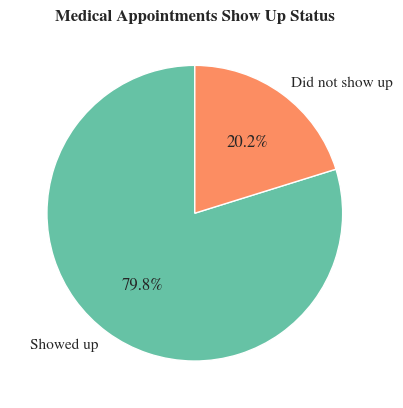

In [652]:
plt.pie(appointment_num, labels = show_up_status, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title("Medical Appointments Show Up Status", fontweight = 'bold') 

### Age distribution of patients

#### Patients who did not show up 

In [696]:
displayed_columns = ['Gender','Age'] 

In [698]:
no_show_age = medical_df[no_show_filter][dis_columns]
no_show_age_df = pd.DataFrame(no_show_age) 

Text(0.5, 1.0, 'Age Distribution by Gender (No shows)')

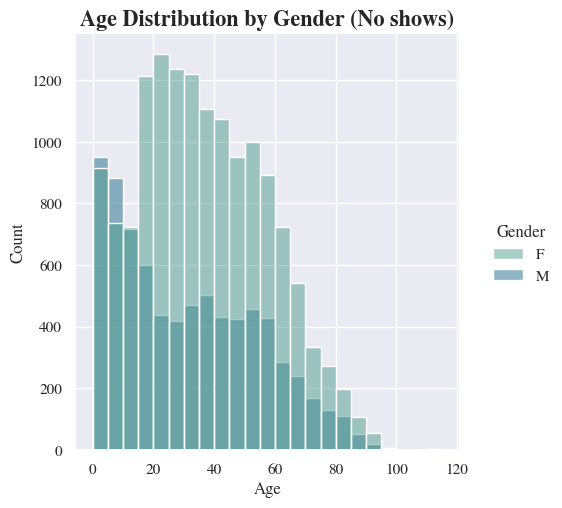

In [730]:
sns.displot(no_show_age_df, x="Age", hue="Gender", binwidth = 5, palette = 'crest')   #flare 
plt.title("Age Distribution by Gender (No shows)", fontweight = 'bold', size = 16) 

#### All Patients

Text(0.5, 1.0, 'Age Distribution by Gender (All patients)')

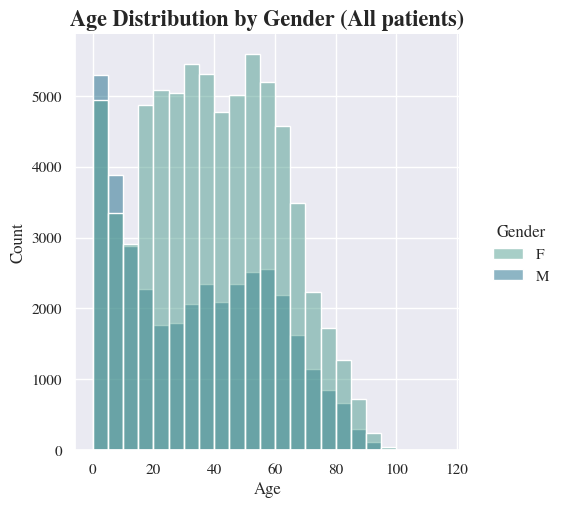

In [710]:
sns.displot(medical_df, x="Age", hue="Gender", binwidth = 5, palette = 'crest')
plt.title("Age Distribution by Gender (All patients)", fontweight = 'bold', size = 16) 

## The Main Characteristics of the No Shows 

Create a __dataframe__ with the __patients who did not show up__ to the appointment

In [1348]:
noshow_df = medical_df[no_show_filter] 

### Location 

In [1353]:
medical_df["Neighbourhood"].nunique()     #The number of neighbourhoods provided in the dataset 

81

Find the __top 10 neighbourhood__ by the __number of Appointments__  

In [1395]:
people_per_neighbourhood = medical_df.groupby("Neighbourhood")["AppointmentID"].count().sort_values(ascending = False).head(10)
neighbourhood = pd.DataFrame(people_per_neighbourhood.reset_index())

__Plot__ the top 10 neighbourhoods

Text(0.5, 1.0, 'Top 10 Neighbourhood by Number of Appointments')

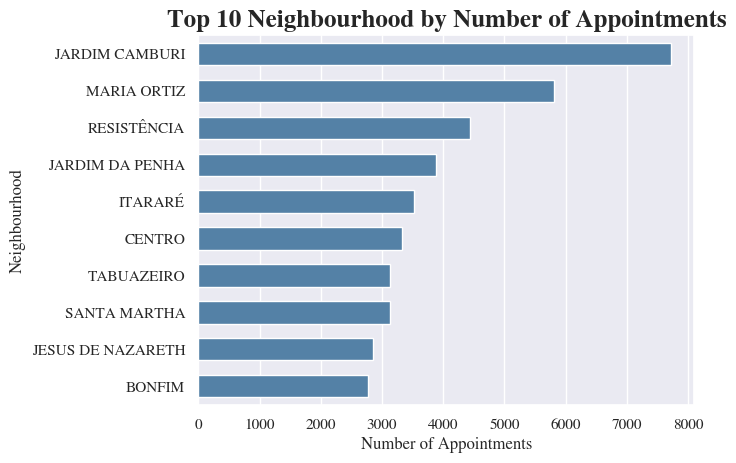

In [849]:
sns.barplot(neighbourhood, x = "AppointmentID", y = "Neighbourhood", width = 0.6, color = 'steelblue')
plt.xlabel('Number of Appointments')
plt.ylabel('Neighbourhood')
plt.title("Top 10 Neighbourhood by Number of Appointments", fontsize = 18, fontweight = 'bold')

Find the __top 10 neighbourhood__ by the __number of Appointments__  (No shows)

In [839]:
people_per_neighbourhood_noshow = noshow_df.groupby("Neighbourhood")["AppointmentID"].count().sort_values(ascending = False).head(10)
neighbourhood_noshow = pd.DataFrame(people_per_neighbourhood_noshow.reset_index())
neighbourhood_noshow

,Neighbourhood,AppointmentID
0,JARDIM CAMBURI,1465
1,MARIA ORTIZ,1219
2,ITARARÉ,923
3,RESISTÊNCIA,905
4,CENTRO,703
5,JESUS DE NAZARETH,696
6,JARDIM DA PENHA,631
7,CARATOÍRA,591
8,TABUAZEIRO,572
9,BONFIM,550


__Plot__ the top 10 neighbourhoods 

Text(0.5, 1.0, 'Top 10 Neighbourhood by Number of Appointments (No-shows)')

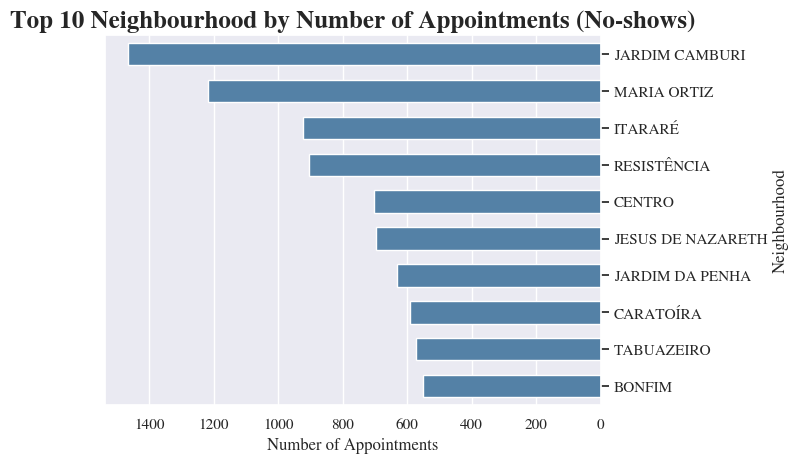

In [879]:
ax = sns.barplot(neighbourhood_noshow, x = "AppointmentID", y = "Neighbourhood", width = 0.6, color = 'steelblue')
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.invert_xaxis()
plt.xlabel('Number of Appointments')
plt.ylabel('Neighbourhood')
plt.title("Top 10 Neighbourhood by Number of Appointments (No-shows)", fontsize = 18, fontweight = 'bold')

### Gender 

Plot the percentage of patients by __gender__ for __all the patients__ and the __patients who did not show up__ to compare. 

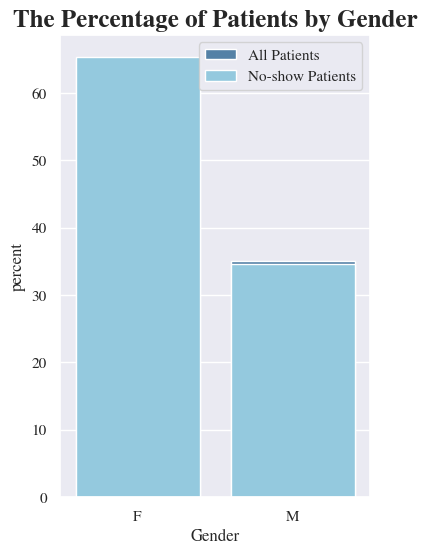

In [824]:
plt.figure(figsize = (4,6))
sns.countplot(medical_df, x="Gender", stat = 'percent', color = 'steelblue')
sns.countplot(noshow_df, x="Gender", stat = 'percent', color = 'skyblue')
plt.title("The Percentage of Patients by Gender", fontsize = 18, fontweight = 'bold')
plt.legend(['All Patients','No-show Patients'])

### Health issues 

Create __2 lists__: one with the __health issues__ and one with the __number of patients__ who has the issue

In [908]:
health_issue_list = ["Hipertension","Diabetes","Alcoholism","Handcap"]
health_issue_list_value = [medical_df.Hipertension.sum(), medical_df.Diabetes.sum(), medical_df.Alcoholism.sum(), medical_df.Handcap.sum()]

health_issue_list_noshow_value = [noshow_df.Hipertension.sum(), noshow_df.Diabetes.sum(), noshow_df.Alcoholism.sum(), noshow_df.Handcap.sum()]

In [918]:
medical_history_df = pd.DataFrame({'Health Issue':health_issue_list , 
                                   'Number of Patients (All)': health_issue_list_value,
                                   'Number of Patients (No-show)': health_issue_list_noshow_value})
medical_history_df

,Health Issue,Number of Patients (All),Number of Patients (No-show)
0,Hipertension,21801,3772
1,Diabetes,7943,1430
2,Alcoholism,3360,677
3,Handcap,2457,451


Text(0.5, 1.0, 'Health Issues in Patients')

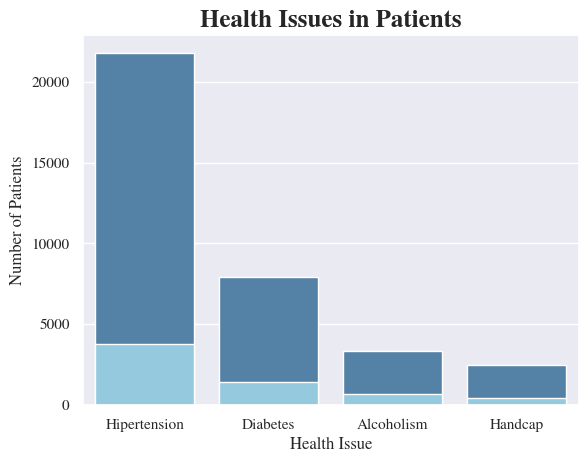

In [960]:
sns.barplot(medical_history_df, x = 'Health Issue', y = 'Number of Patients (All)', color = 'steelblue')
sns.barplot(medical_history_df, x = 'Health Issue', y = 'Number of Patients (No-show)', color = 'skyblue')
plt.ylabel("Number of Patients")
plt.title("Health Issues in Patients", fontsize = 18, fontweight = 'bold')

#### Does having two health issues affect the attendance? (Optional) 

In [1334]:
Hipertension_filter = medical_df.Hipertension==1
Diabetes_filter = medical_df.Diabetes==1
both_filter = (medical_df.Hipertension==1) & (medical_df.Diabetes==1)

In [1336]:
#Find the number of patients with Hipertension and Diabetes 
both = medical_df[both_filter]['PatientId'].count()

#Find the number of patients with Hipertension and Diabetes who showed up 
both_attended = medical_df[both_filter & show_filter]['PatientId'].count()
#Find the number of patients with Hipertension and Diabetes who did not showed up 
both_noattended = medical_df[both_filter & no_show_filter]['PatientId'].count()

#Create a list with the sum 
health = [medical_df.Hipertension.sum(),medical_df.Diabetes.sum(),both]

#Find the number of patients with Hipertension who showed up 
attend_Hipertension= medical_df[Hipertension_filter & show_filter]['PatientId'].count()
attend_Diabetes= medical_df[Diabetes_filter & show_filter]['PatientId'].count()

attend_both = both_attended
noattend_Diabetes= medical_df[Diabetes_filter & no_show_filter]['PatientId'].count()
noattend_Hipertension= medical_df[Hipertension_filter & no_show_filter]['PatientId'].count()

noattend_both =both_noattended
Columns = ['Hipertension','Diabetes','both']

#Create a data frame with the calculated values 
pd.DataFrame({'Health issues':Columns,'Number of patient': health, 'Attend': [attend_Hipertension,attend_Diabetes, attend_both], 'Not attend':[noattend_Hipertension,noattend_Diabetes,noattend_both]})


,Health issues,Number of patient,Attend,Not attend
0,Hipertension,21801,18029,3772
1,Diabetes,7943,6513,1430
2,both,6486,5345,1141


## The Effect of SMS reminder and Time Gap on Appointment Attendance 

### Does receiving an SMS reduce no-show rates?

Calculate the number of patients who __received an SMS or not__ based on the __Show Up status__. 

In [1206]:
SMS_attendance_df = pd.DataFrame(medical_df.groupby("SMS_received")["No-show"].value_counts().unstack())
SMS_attendance_df

No-show,Attend,Did not attend
SMS_received,,
No,62509,12530
Yes,25698,9784


Change the count of patients to __percentages__ 

In [1169]:
precentage =pd.DataFrame(medical_df.groupby("SMS_received")["No-show"].value_counts(normalize=True).unstack())
round(precentage*100)

No-show,Attend,Did not attend
SMS_received,,
No,83.0,17.0
Yes,72.0,28.0


Make a comparison plot with the number of patients based on __SMS-received status__ and __Show-up Status__

Text(0.5, 1.0, 'Effect of SMS Reminders on Appointment Attendance')

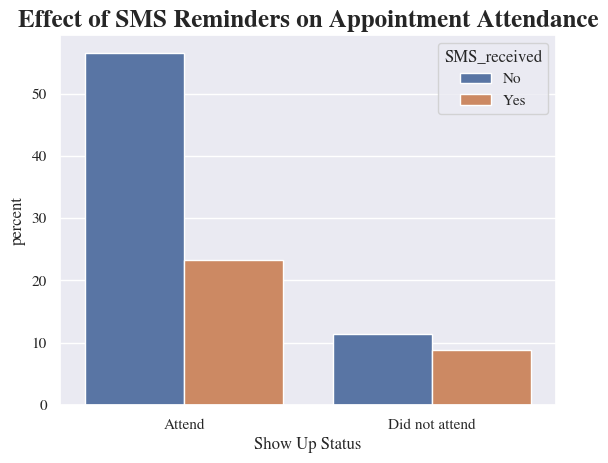

In [1138]:
sns.countplot(medical_df, x= "No-show", hue="SMS_received", stat="percent") 
plt.xlabel("Show Up Status")
plt.title("Effect of SMS Reminders on Appointment Attendance", fontsize = 18, fontweight = 'bold')

### Is the Time Gap related to attending the appointment?

People who booked at the same day of appointment 

In [931]:
(medical_df['TimeGap'] == pd.Timedelta(0)).sum()  

38562

People who booked at the same day of appointment and did not show 

In [933]:
((medical_df['TimeGap'] == pd.Timedelta(0)) & (no_show_filter)).sum()

1792

Find the most common __time gap__ by the __number of no shows__ 

In [1019]:
noshow = medical_df.groupby("TimeGap")['No-show'].count()
noshow.sort_values(ascending = False)

TimeGap
0 days      38562
2 days       6725
4 days       5290
1 days       5213
7 days       4906
            ...  
146 days        1
151 days        1
82 days         1
101 days        1
117 days        1
Name: No-show, Length: 129, dtype: int64

Plot the __time gap distribution__ for all the patients 

(0.0, 70.0)

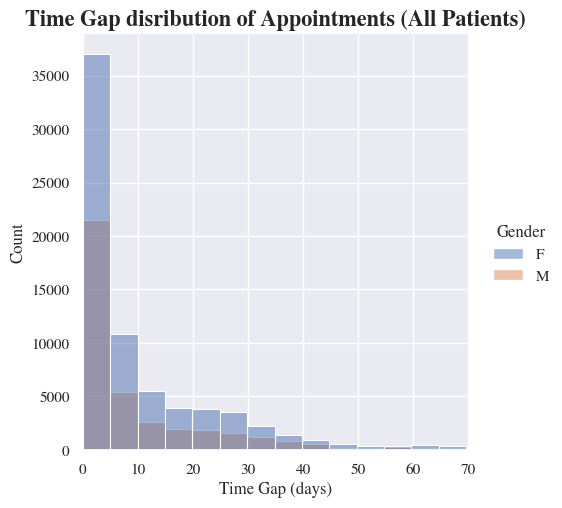

In [1165]:
sns.displot(medical_df, x = 'TimeGap', binwidth = 5, hue = 'Gender')
plt.xlabel("Time Gap (days)") 
plt.title("Time Gap disribution of Appointments (All Patients)",fontsize = 16, fontweight = 'bold') 
plt.xlim(0,70)

Plot the __time gap distribution__ for the __no shows__ 

(0.0, 70.0)

<Figure size 400x200 with 0 Axes>

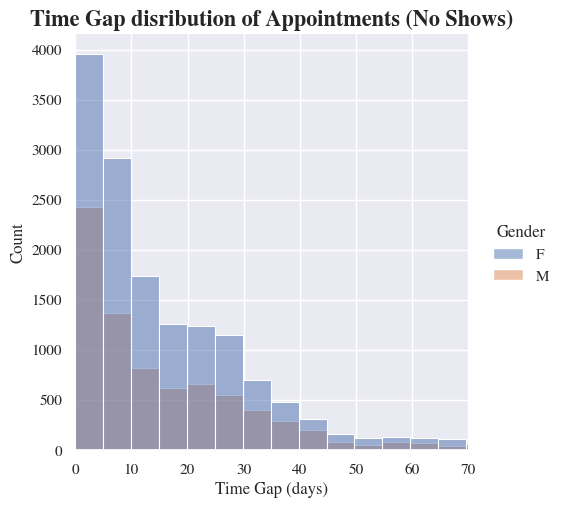

In [1118]:
sns.displot(noshow_df, x = 'TimeGap', binwidth = 5, hue = 'Gender')
plt.xlabel("Time Gap (days)") 
plt.title("Time Gap disribution of Appointments (No Shows)",fontsize = 16, fontweight = 'bold') 
plt.xlim(0,70)

(0.0, 10.0)

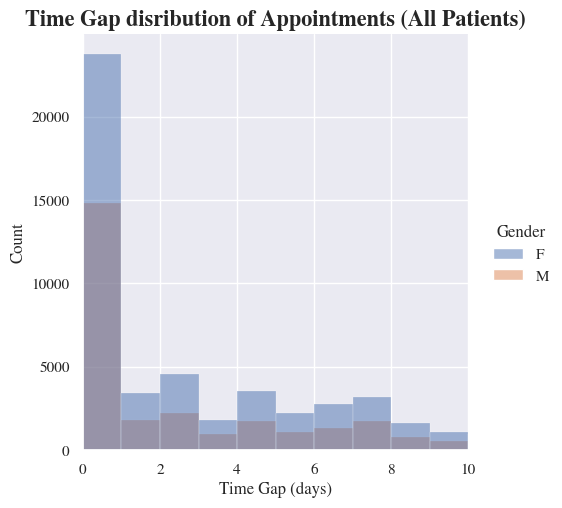

In [1174]:
sns.displot(medical_df, x = 'TimeGap',binwidth = 1, hue = 'Gender')
plt.xlabel("Time Gap (days)") 
plt.title("Time Gap disribution of Appointments (All Patients)",fontsize = 16, fontweight = 'bold') 
plt.xlim(0,10)

(0.0, 10.0)

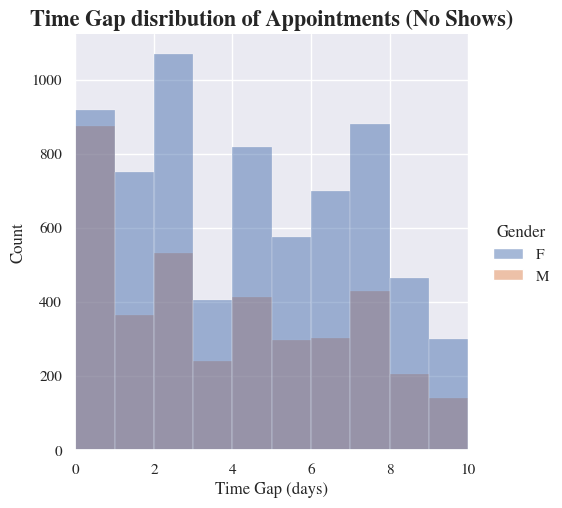

In [1176]:
sns.displot(noshow_df, x = 'TimeGap', binwidth = 1, hue = 'Gender')
plt.xlabel("Time Gap (days)") 
plt.title("Time Gap disribution of Appointments (No Shows)",fontsize = 16, fontweight = 'bold') 
plt.xlim(0,10)

## Finding Correlations: Correlation Matrix 

Find the __correlation coefficient__ between two variables 

In [1366]:
correlation = np.corrcoef(correlation_df['No-show'],correlation_df['Hipertension'])
print('Correlations between Show Up Status and Hipertension\n',correlation)

Correlations between Show Up Status and Hipertension
 [[ 1.         -0.03566232]
 [-0.03566232  1.        ]]


Replace the strings with __numeric values__ to apply the correlation test 

In [ ]:
correlation_df= medical_df.replace('Did not attend', 1)
correlation_df = correlation_df.replace('Attend', 0)
correlation_df = correlation_df.replace('Yes', 1)
correlation_df = correlation_df.replace('No', 0)

Create a __Correlation Matrix__ with the chosen parameters 

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'No-show'),
  Text(0, 1.5, 'Scholarship'),
  Text(0, 2.5, 'Hipertension'),
  Text(0, 3.5, 'Diabetes'),
  Text(0, 4.5, 'Handcap'),
  Text(0, 5.5, 'Alcoholism'),
  Text(0, 6.5, 'SMS_received')])

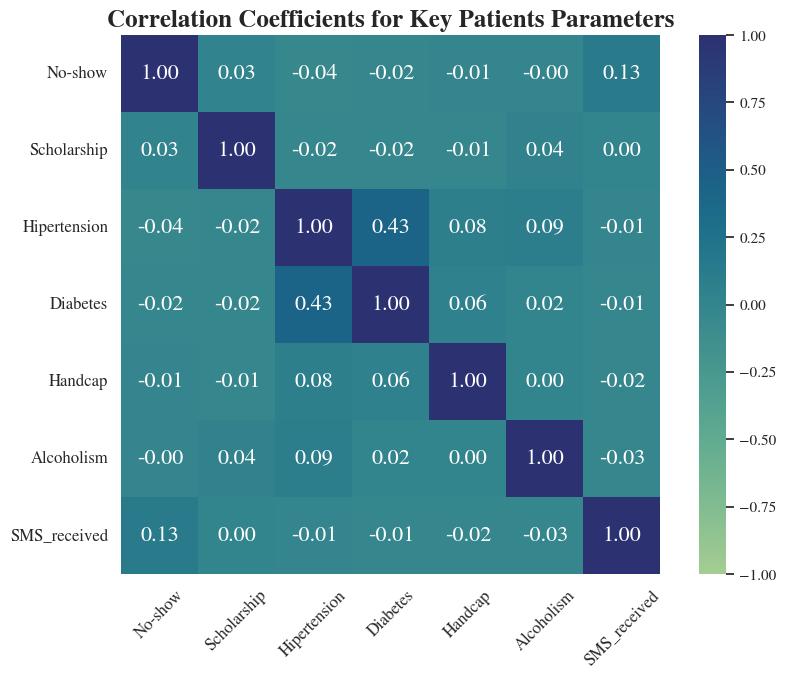

In [1346]:
params = ['No-show','Scholarship','Hipertension', 'Diabetes', 'Handcap','Alcoholism','SMS_received'] 
correlation_matrix = correlation_df[params].corr()

plt.figure(figsize=(10, 7))

sns.heatmap(correlation_matrix,
            annot=True,
            cmap='crest',
            vmin = -1, vmax = 1,
            center=0,
            fmt='.2f',
            square=True,
            annot_kws={'size': 16})

plt.title('Correlation Coefficients for Key Patients Parameters', fontsize=18,y=1, fontweight = 'bold')
plt.xticks(rotation=45,fontsize=12)
plt.yticks(rotation=0, fontsize=12)